# 개요: non-oversampling + SVM
1. feature selection--- 한국은행 + Atman 총 11개 변수가 선택됨
2. Modeling ---------- SVM



In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
# df_full feature selection과 padding 완료된 데이터
df_full = pd.read_csv(r'..\..\..\Data\최종데이터셋\Finaldataset_ver6.csv')
df = df_full
#df_ = pd.read_csv(r'..\..\..\Data\Dataset.csv',index_col=0)
#final = pd.read_csv(r'..\..\..\Data\최종데이터셋\Finaldataset.csv')


In [6]:
df

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,부도,공시발생일,정기공시제목,수시공시제목,대표이사 변경,최대주주 변경,회계처리위반,횡령배임,폐지사유요약합본,"(13957, '부도')"
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.00,0.019074,179.37,131.99,...,1.0,0,0,0,0.0,0.0,0.0,0.0,['N'],1
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.00,0.023517,179.37,131.99,...,1.0,0,0,0,0.0,0.0,0.0,0.0,['N'],1
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.00,0.043081,133.37,132.37,...,1.0,0,0,0,1.0,0.0,0.0,0.0,['N'],1
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.00,0.058531,131.30,71.46,...,1.0,0,0,0,1.0,0.0,0.0,0.0,['N'],1
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.00,0.047346,52.25,101.56,...,1.0,0,0,0,1.0,0.0,0.0,0.0,['N'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,흥구석유(주),24060.0,2016/12,5.0,0,UQ,2.10,0.012651,4611.84,5.19,...,1.0,0,0,0,0.0,0.0,0.0,0.0,['N'],1
26828,흥구석유(주),24060.0,2017/12,5.0,0,UQ,2.08,0.012502,4650.29,12.83,...,1.0,0,0,0,0.0,0.0,0.0,0.0,['N'],1
26829,흥구석유(주),24060.0,2018/12,5.0,0,UQ,2.48,0.018056,4696.15,5.40,...,1.0,0,0,0,0.0,0.0,0.0,0.0,['N'],1
26830,흥구석유(주),24060.0,2019/12,5.0,0,UQ,2.83,0.000300,5133.42,6.05,...,1.0,0,0,0,0.0,0.0,0.0,0.0,['N'],1


## corr 확인(접어주세용)

In [267]:
last = pd.read_csv(r'..\..\..\Data\최종데이터셋\Finaldataset_ver3.csv',index_col=0)

In [268]:
last

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,key,부도,공시발생일,text,link,TS,폐지사유,폐지사유요약,정기공시제목,수시공시제목
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.00,0.019074,179.37,131.99,...,588202001,1.0,0,0,0,0,0,0,0,0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.00,0.023517,179.37,131.99,...,588202002,1.0,0,0,0,0,0,0,0,0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.00,0.043081,133.37,132.37,...,588202003,1.0,0,0,0,0,0,0,0,0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.00,0.058531,131.30,71.46,...,588202004,1.0,0,0,0,0,0,0,0,0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.00,0.047346,52.25,101.56,...,588202005,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27148,흥구석유(주),24060.0,2016/12,5.0,0,UQ,2.10,0.012651,4611.84,5.19,...,240602017,1.0,0,0,0,0,0,0,0,0
27149,흥구석유(주),24060.0,2017/12,5.0,0,UQ,2.08,0.012502,4650.29,12.83,...,240602018,1.0,0,0,0,0,0,0,0,0
27150,흥구석유(주),24060.0,2018/12,5.0,0,UQ,2.48,0.018056,4696.15,5.40,...,240602019,1.0,0,0,0,0,0,0,0,0
27151,흥구석유(주),24060.0,2019/12,5.0,0,UQ,2.83,0.000300,5133.42,6.05,...,240602020,1.0,0,0,0,0,0,0,0,0


In [275]:
coll = [ '자기자본배당률',
       '금융비용 대 부채비율', '자기자본배율', '유동부채비율', '매입채무회전률', '유동자산회전률', '총자본투자효율',
       '순운전자본비율', '누적수익성비율', '총자산영업이익률', '총자산회전율']

In [274]:
last.columns

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '자기자본배당률',
       '금융비용 대 부채비율', '자기자본배율', '유동부채비율', '매입채무회전률', '유동자산회전률', '총자본투자효율',
       '순운전자본비율', '누적수익성비율', '총자산영업이익률', '총자산회전율', '년', 'key', '부도', '공시발생일',
       'text', 'link', 'TS', '폐지사유', '폐지사유요약', '정기공시제목', '수시공시제목'],
      dtype='object')

In [277]:
last[coll].corr()

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율
자기자본배당률,1.000000,-0.021447,-0.000668,-0.003489,0.000192,0.008310,0.011204,0.020762,0.022182,0.015594,0.017918
금융비용 대 부채비율,-0.021447,1.000000,-0.003765,0.027841,-0.006335,-0.048789,-0.097862,-0.166782,-0.250091,-0.116517,-0.099816
자기자본배율,-0.000668,-0.003765,1.000000,-0.002179,0.000086,-0.018875,-0.005249,0.027785,-0.011715,-0.006914,-0.020442
유동부채비율,-0.003489,0.027841,-0.002179,1.000000,-0.001882,0.011474,-0.024845,-0.081530,-0.042579,-0.036136,0.012552
매입채무회전률,0.000192,-0.006335,0.000086,-0.001882,1.000000,0.062386,0.004730,0.002453,0.004881,0.004075,0.025246
유동자산회전률,0.008310,-0.048789,-0.018875,0.011474,0.062386,1.000000,0.113756,-0.221806,0.098065,0.103810,0.612283
총자본투자효율,0.011204,-0.097862,-0.005249,-0.024845,0.004730,0.113756,1.000000,0.368788,0.588801,0.590551,0.066309
순운전자본비율,0.020762,-0.166782,0.027785,-0.081530,0.002453,-0.221806,0.368788,1.000000,0.516758,0.291977,-0.064938
누적수익성비율,0.022182,-0.250091,-0.011715,-0.042579,0.004881,0.098065,0.588801,0.516758,1.000000,0.614524,0.034663
총자산영업이익률,0.015594,-0.116517,-0.006914,-0.036136,0.004075,0.103810,0.590551,0.291977,0.614524,1.000000,0.057763


<AxesSubplot:>

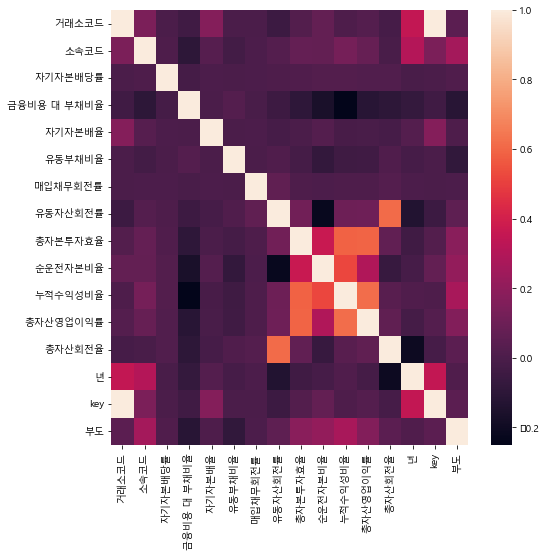

In [271]:
import seaborn as sns
sns.heatmap(last.corr())

In [140]:
df_full

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,년,key,공시제목,부도
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.00,0.019074,179.37,131.99,...,0.97,8.76,22.76,0.189100,0.052949,1.761228,2001.0,588202001,0,1.0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.00,0.023517,179.37,131.99,...,0.97,8.76,22.76,0.005261,0.014062,0.756792,2002.0,588202002,0,1.0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.00,0.043081,133.37,132.37,...,2.01,0.79,7.98,-0.139212,-0.247841,1.713785,2003.0,588202003,0,1.0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.00,0.058531,131.30,71.46,...,1.89,16.80,35.58,-0.203019,-0.082618,1.571816,2004.0,588202004,0,1.0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.00,0.047346,52.25,101.56,...,2.11,-37.94,24.97,-1.181502,-0.547982,2.526356,2005.0,588202005,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,2.10,0.012651,4611.84,5.19,...,10.07,8.84,14.15,0.414800,0.012181,1.817620,2017.0,240602017,0,1.0
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,2.08,0.012502,4650.29,12.83,...,10.14,8.80,8.68,0.417422,0.009398,1.946103,2018.0,240602018,0,1.0
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,2.48,0.018056,4696.15,5.40,...,11.71,9.80,11.59,0.453302,0.014520,2.210036,2019.0,240602019,0,1.0
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,2.83,0.000300,5133.42,6.05,...,8.58,18.02,21.47,0.485889,0.005988,1.800947,2020.0,240602020,0,1.0


In [141]:
27357 -27294 

63

In [153]:
final.columns

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '자기자본배당률',
       '금융비용 대 부채비율', '자기자본배율', '유동부채비율', '매입채무회전률', '유동자산회전률', '총자본투자효율',
       '순운전자본비율', '누적수익성비율', '총자산영업이익률', '총자산회전율', '년', 'key', '공시제목_x', '부도',
       '공시발생일', '공시제목_y', 'text', 'link', 'TS', '폐지사유', '폐지사유요약'],
      dtype='object')

## 데이터 세팅

In [7]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '자기자본배당률',
       '금융비용 대 부채비율', '자기자본배율', '유동부채비율', '매입채무회전률', '유동자산회전률', '총자본투자효율',
       '순운전자본비율', '누적수익성비율', '총자산영업이익률', '총자산회전율', '년', 'key', '부도', '공시발생일',
       '정기공시제목', '수시공시제목', '대표이사 변경', '최대주주 변경', '회계처리위반', '횡령배임', '폐지사유요약합본',
       '(13957, '부도')'],
      dtype='object')

In [32]:
# 앞 뒤에 붙은 object 변수 리스트 처리
col_object = ['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '년', 'key', '부도', '공시발생일',
       '정기공시제목', '수시공시제목', '폐지사유요약합본',
       "(13957, '부도')"]
col_head = ['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드']
col_tail = ['년', 'key', '부도', '공시발생일',
       '정기공시제목', '수시공시제목', '폐지사유요약합본', "(13957, '부도')"]

In [33]:
X = df.drop(columns = col_object)
y = df['부도']
print(X.shape)
print(y.shape)

(26832, 15)
(26832,)


In [40]:
X['회계처리위반'].value_counts()

0.0    26514
1.0      272
2.0       42
3.0        4
Name: 회계처리위반, dtype: int64

In [41]:
X['대표이사 변경'].value_counts()

0.0    22120
1.0     3415
2.0      901
3.0      245
4.0       96
5.0       35
6.0       11
7.0        7
9.0        2
Name: 대표이사 변경, dtype: int64

In [42]:
X['횡령배임'].value_counts()

0.0     26500
1.0       183
2.0        69
3.0        49
4.0        13
5.0         8
6.0         3
8.0         2
7.0         2
20.0        1
13.0        1
12.0        1
Name: 횡령배임, dtype: int64

In [34]:
X

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,대표이사 변경,최대주주 변경,회계처리위반,횡령배임
0,0.00,0.019074,179.37,131.99,24.84,0.97,8.76,22.76,0.189100,0.052949,1.761228,0.0,0.0,0.0,0.0
1,0.00,0.023517,179.37,131.99,24.84,0.97,8.76,22.76,0.005261,0.014062,0.756792,0.0,0.0,0.0,0.0
2,0.00,0.043081,133.37,132.37,58.88,2.01,0.79,7.98,-0.139212,-0.247841,1.713785,1.0,0.0,0.0,0.0
3,0.00,0.058531,131.30,71.46,26.59,1.89,16.80,35.58,-0.203019,-0.082618,1.571816,1.0,0.0,0.0,0.0
4,0.00,0.047346,52.25,101.56,24.16,2.11,-37.94,24.97,-1.181502,-0.547982,2.526356,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26827,2.10,0.012651,4611.84,5.19,179576.67,10.07,8.84,14.15,0.414800,0.012181,1.817620,0.0,0.0,0.0,0.0
26828,2.08,0.012502,4650.29,12.83,5044.25,10.14,8.80,8.68,0.417422,0.009398,1.946103,0.0,0.0,0.0,0.0
26829,2.48,0.018056,4696.15,5.40,5128.70,11.71,9.80,11.59,0.453302,0.014520,2.210036,0.0,0.0,0.0,0.0
26830,2.83,0.000300,5133.42,6.05,23497.93,8.58,18.02,21.47,0.485889,0.005988,1.800947,0.0,0.0,0.0,0.0


In [35]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
26827    1.0
26828    1.0
26829    1.0
26830    1.0
26831    1.0
Name: 부도, Length: 26832, dtype: float64

In [17]:
del X,y

## SMOTE Oversampling (접어주세용 / 진행안함)

In [210]:
# 부도 칼럼을 기준으로 오버샘플링
sm = SMOTE() #k_neighbors , random_state

X_resample, y_resample = sm.fit_resample(X, y)

print('Before OverSampling, the shape of X: {}'.format(X.shape))
print('Before OverSampling, the shape of y: {}'.format(y.shape))
print(y.value_counts())
print('After OverSampling, the shape of X: {}'.format(X_resample.shape))
print('After OverSampling, the shape of y: {}'.format(y_resample.shape))
print(y_resample.value_counts())

Before OverSampling, the shape of X: (27294, 11)
Before OverSampling, the shape of y: (27294,)
1.0    26841
0.0      453
Name: 부도, dtype: int64
After OverSampling, the shape of X: (53682, 11)
After OverSampling, the shape of y: (53682,)
1.0    26841
0.0    26841
Name: 부도, dtype: int64


Text(0.5, 1.0, 'oversampling 후')

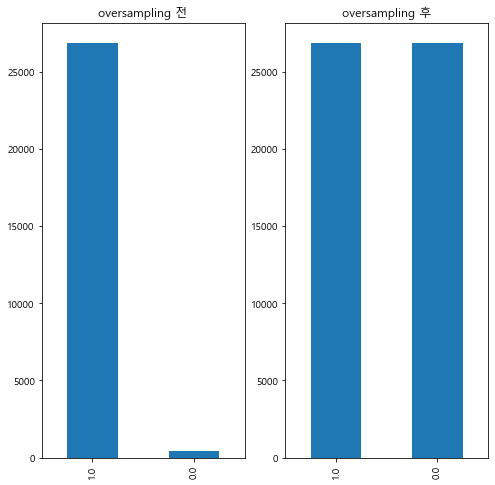

In [211]:
plt.subplot(1,2,1)
y.value_counts().plot(kind='bar')
plt.title('oversampling 전')

plt.subplot(1,2,2)
y_resample.value_counts().plot(kind='bar')
plt.title('oversampling 후')

In [224]:
X_resample = X_resample.drop(columns=['부도'])

In [226]:
X_resample

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율
0,0.000000,0.019074,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.189100,0.052949,1.761228
1,0.000000,0.023517,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.005261,0.014062,0.756792
2,0.000000,0.043081,133.370000,132.370000,58.880000,2.010000,0.790000,7.980000,-0.139212,-0.247841,1.713785
3,0.000000,0.058531,131.300000,71.460000,26.590000,1.890000,16.800000,35.580000,-0.203019,-0.082618,1.571816
4,0.000000,0.047346,52.250000,101.560000,24.160000,2.110000,-37.940000,24.970000,-1.181502,-0.547982,2.526356
...,...,...,...,...,...,...,...,...,...,...,...
53677,0.000000,0.027043,441.310000,486.590000,4.800000,1.510000,-31.870000,-21.490000,-0.067085,-0.103632,1.087887
53678,0.000000,0.033387,50.260983,164.639836,12.414932,2.393861,-58.468894,-9.577096,-1.080292,-0.274333,1.232275
53679,0.000000,0.048563,515.269572,96.100317,5.465254,0.908916,-13.915334,-27.997946,-0.189089,-0.247416,0.372127
53680,0.805501,0.046106,633.114011,66.186633,13.671686,2.807652,16.616018,10.652607,0.135924,0.084595,0.927329


In [225]:
y_resample

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
53677    0.0
53678    0.0
53679    0.0
53680    0.0
53681    0.0
Name: 부도, Length: 53682, dtype: float64

In [212]:
df_new = X_resample
df_new['부도'] = y_resample
df_new

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,부도
0,0.000000,0.019074,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.189100,0.052949,1.761228,1.0
1,0.000000,0.023517,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.005261,0.014062,0.756792,1.0
2,0.000000,0.043081,133.370000,132.370000,58.880000,2.010000,0.790000,7.980000,-0.139212,-0.247841,1.713785,1.0
3,0.000000,0.058531,131.300000,71.460000,26.590000,1.890000,16.800000,35.580000,-0.203019,-0.082618,1.571816,1.0
4,0.000000,0.047346,52.250000,101.560000,24.160000,2.110000,-37.940000,24.970000,-1.181502,-0.547982,2.526356,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53677,0.000000,0.027043,441.310000,486.590000,4.800000,1.510000,-31.870000,-21.490000,-0.067085,-0.103632,1.087887,0.0
53678,0.000000,0.033387,50.260983,164.639836,12.414932,2.393861,-58.468894,-9.577096,-1.080292,-0.274333,1.232275,0.0
53679,0.000000,0.048563,515.269572,96.100317,5.465254,0.908916,-13.915334,-27.997946,-0.189089,-0.247416,0.372127,0.0
53680,0.805501,0.046106,633.114011,66.186633,13.671686,2.807652,16.616018,10.652607,0.135924,0.084595,0.927329,0.0


In [213]:
df_new['부도'].value_counts()

1.0    26841
0.0    26841
Name: 부도, dtype: int64

In [214]:
bankrupt_0 = df_new.loc[df_new['부도'] == 0].drop(columns=['부도'])
bankrupt_1 = df_new.loc[df_new['부도'] == 1].drop(columns=['부도'])

In [215]:
#t-test진행 -> 전 칼럼 p-value 0.05이하로 귀무가설 기각 확인
stats.ttest_ind(bankrupt_0, bankrupt_1)[1] <0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Modeling

### Random Forest

In [11]:
#baseline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict)

<bound method ForestClassifier.predict of RandomForestClassifier(max_depth=2, random_state=0)>


In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, test_size=0.3)


print("Train set: ")
print(X_train.shape)
print(X_test.shape)
print("===========")
print("Test set: ")
print(y_train.shape)
print(y_test.shape)

rf_clf=RandomForestClassifier(n_estimators=300, criterion='gini' ,max_depth=10,min_samples_split=2
                           ,bootstrap=True, oob_score= True, max_features = 'auto', random_state=3,
                           max_leaf_nodes= 10)

rf_clf.fit(X_train, y_train)
pred=rf_clf.predict_log_proba(X_train)
accuracy  = round(cross_val_score(rf_clf, X_train, y_train).mean()*100, 4)
print("Accuracy : ", accuracy , "%")
#print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_val_pred)}")

Train set: 
(18782, 15)
(8050, 15)
Test set: 
(18782,)
(8050,)


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature n

Accuracy :  98.4879 %


In [87]:
predicted_proba[:,0]

array([0.00538617, 0.0060964 , 0.00538617, ..., 0.05273626, 0.0134715 ,
       0.00538617])

In [84]:
(predicted_proba [:,1] >= threshold)

array([ True,  True,  True, ...,  True,  True,  True])

In [90]:
threshold = 0.3
predicted_proba = rf_clf.predict_proba(X_test)
predicted = (predicted_proba[:,0] <= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)
accuracy

0.9839751552795031

In [64]:
pred=rf_clf.predict_proba(X_test)
pred


array([[0.00538617, 0.99461383],
       [0.0060964 , 0.9939036 ],
       [0.00538617, 0.99461383],
       ...,
       [0.05273626, 0.94726374],
       [0.0134715 , 0.9865285 ],
       [0.00538617, 0.99461383]])

In [69]:
pred[:,1]

array([0.99461383, 0.9939036 , 0.99461383, ..., 0.94726374, 0.9865285 ,
       0.99461383])

In [72]:
sibal = pd.DataFrame({'부도일 확률': pred[:,0], '정상일 확률' : pred[:,1], 'True' : y_test})
sibal

,부도일 확률,정상일 확률,True
11879,0.005386,0.994614,1.0
19907,0.006096,0.993904,1.0
9162,0.005386,0.994614,1.0
8872,0.070902,0.929098,1.0
12595,0.007396,0.992604,1.0
...,...,...,...
12558,0.005669,0.994331,1.0
13829,0.009257,0.990743,1.0
26594,0.052736,0.947264,1.0
10757,0.013472,0.986528,1.0


In [80]:
X_test.loc[19892]

자기자본배당률          0.000000
금융비용 대 부채비율      0.035907
자기자본배율           0.000000
유동부채비율           0.000000
매입채무회전률          2.500000
유동자산회전률          2.140000
총자본투자효율       -283.750000
순운전자본비율        -83.200000
누적수익성비율         -5.498976
총자산영업이익률        -0.339772
총자산회전율           0.721686
대표이사 변경          1.000000
최대주주 변경          2.000000
회계처리위반           0.000000
횡령배임             1.000000
Name: 19892, dtype: float64

In [79]:
sibal.loc[sibal['부도일 확률'] >= 0.5] 

,부도일 확률,정상일 확률,True
13968,0.502361,0.497639,0.0
19892,0.500535,0.499465,1.0
15846,0.501693,0.498307,1.0


<AxesSubplot:>

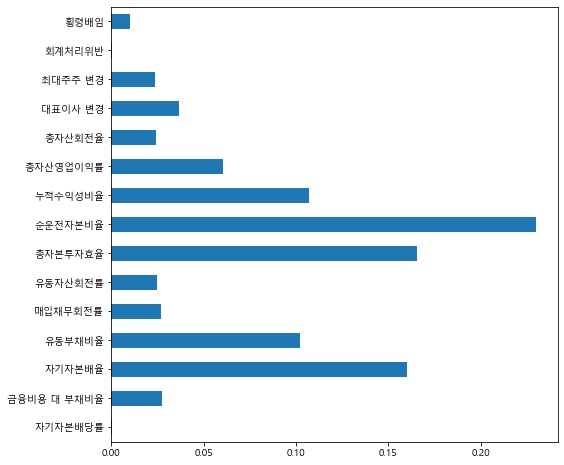

In [52]:
feat_importances = pd.Series(rf_clf.feature_importances_ , index= X_train.columns)
feat_importances.plot(kind = 'barh')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


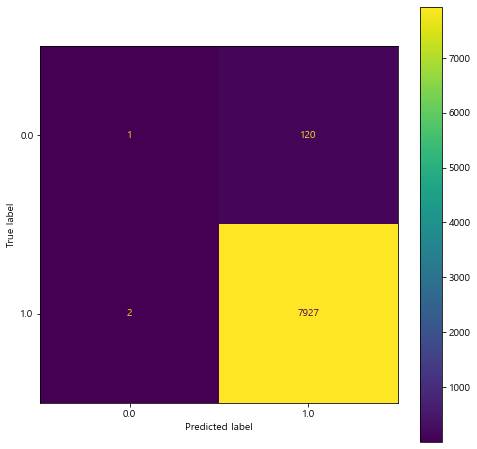

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(rf_clf, X_test, y_test)
plt.show()

In [46]:
rf_clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9849689440993789

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


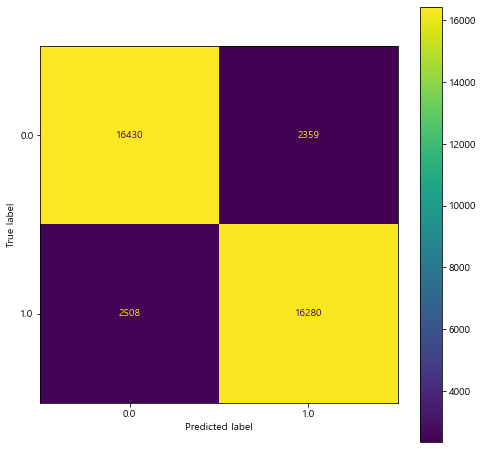

In [233]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(rf_clf, X_train, y_train)
plt.show()

In [261]:
print("f1_score: {:.3f}".format(f1_score(y, lsvc.predict(X), average='macro')))

f1_score: 0.517


In [263]:
pred.shape

(37577, 2)

In [264]:
pred

array([[-0.67920802, -0.70728339],
       [-1.38594695, -0.2877979 ],
       [-2.79774033, -0.06288403],
       ...,
       [-0.27939184, -1.41158559],
       [-0.1158823 , -2.21256195],
       [-2.80040329, -0.06271144]])

In [262]:

#print("roc_auc_score: {:.3f}".format(roc_auc_score(X_test, pred)))

ValueError: continuous-multioutput format is not supported

In [ ]:
"""나중에 k-fold까지 진행하기

from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(cat_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        cat_clf.fit(X_train, y_train)
        
        predictions=cat_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cat_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_clf)

"""

### SVM

In [234]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from tqdm import tqdm
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

In [243]:
LinearSVC(C=1, penalty="l1", dual=False).fit(X_resample, y_resample)
lsvc = LinearSVC(C=1, penalty="l1", dual=False).fit(X_resample, y_resample)
print("훈련 세트 정확도: {:.3f}".format(lsvc.score(X_resample, y_resample)))
print("f1_score: {:.3f}".format(f1_score(y_resample, lsvc.predict(X_resample), average='macro')))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y_resample, lsvc.predict(X_resample))))

훈련 세트 정확도: 0.829
f1_score: 0.829
roc_auc_score: 0.829


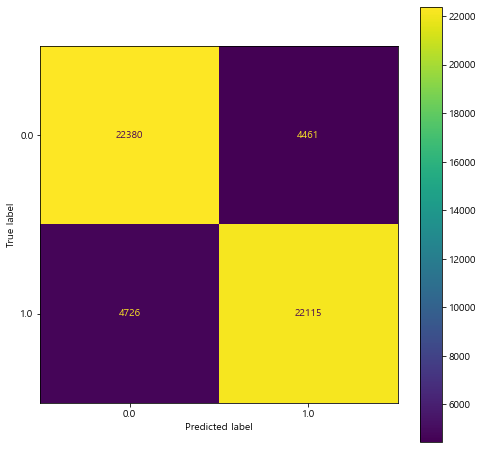

In [242]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(lsvc, X_resample, y_resample)
plt.show()

In [259]:
pred

array([[-0.67920802, -0.70728339],
       [-1.38594695, -0.2877979 ],
       [-2.79774033, -0.06288403],
       ...,
       [-0.27939184, -1.41158559],
       [-0.1158823 , -2.21256195],
       [-2.80040329, -0.06271144]])